# Générer le graphe

## D'abord generer la matrice d'adjacence

In [11]:
import numpy as np
import random

def generer_matrice_adjacence(taille,typeDeGraphe):
    matrice = np.empty((taille, taille))              
    
    if(typeDeGraphe == 'Complete'):               
        for i in range(taille):
            for j in range(i,taille):
                valeur = 1 if i!=j else 0 
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    else:
         for i in range(taille):
            for j in range(i,taille):
                valeur = random.randint(0, 1)  if i!=j else 0
                matrice[i][j] = valeur
                matrice[i][j] = valeur
    return matrice

matriceAdjacence = generer_matrice_adjacence(8, "Not-Complete")
print(matriceAdjacence)

print("\n \n")     

matriceAdjacence = generer_matrice_adjacence(8, "Complete")
print(matriceAdjacence)

[[  0.   1.   0.   0.   1.   0.   1.   1.]
 [  1.   0.   0.   0.   0.   1.   0.   0.]
 [228.   1.   0.   1.   0.   1.   1.   0.]
 [579.   1.   1.   0.   1.   1.   1.   0.]
 [  1. 410. 550.  86.   0.   1.   0.   1.]
 [373. 376. 522. 132.   1.   0.   1.   0.]
 [340.   1.   1.   1. 858. 687.   0.   0.]
 [130. 622.   1.   1.   1. 373.   1.   0.]]

 

[[0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0.]]


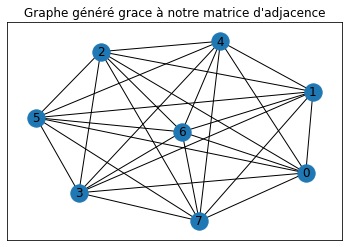

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph(matriceAdjacence, nodetype=int)
plt.title("Graphe généré grace à notre matrice d'adjacence")
nx.draw_networkx(G)

## Génerer la liste des voisins de chaque sommet en se basant sur la matrice d'adjacence

.

In [13]:
def lister_voisins(matriceAdjacence):
   
    taille = len(matriceAdjacence.T)
    voisins = []
    i=0
    while (i <= taille-1):
        for j in range(taille):
            if(matriceAdjacence[i][j] != 0 and matriceAdjacence[j][i]!=0 ):
                voisins.append(j+1)
        print("Les voisins du sommet", i+1, "sont :",voisins)
        voisins.clear()
        i+=1
        
lister_voisins(matriceAdjacence)

Les voisins du sommet 1 sont : [2, 3, 4, 5, 6, 7, 8]
Les voisins du sommet 2 sont : [1, 3, 4, 5, 6, 7, 8]
Les voisins du sommet 3 sont : [1, 2, 4, 5, 6, 7, 8]
Les voisins du sommet 4 sont : [1, 2, 3, 5, 6, 7, 8]
Les voisins du sommet 5 sont : [1, 2, 3, 4, 6, 7, 8]
Les voisins du sommet 6 sont : [1, 2, 3, 4, 5, 7, 8]
Les voisins du sommet 7 sont : [1, 2, 3, 4, 5, 6, 8]
Les voisins du sommet 8 sont : [1, 2, 3, 4, 5, 6, 7]


## Génerer la matrice symétrique pondérée

In [14]:
def generer_matrice_pondere(matrice):
    for i in range(len(matrice.T)):
        for j in range(i,len(matrice.T)):
            if(matrice[i][j] != 0):
                valeur = random.randint(0, 999)
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    return matrice

matricePondere = generer_matrice_pondere(matriceAdjacence)
print(matricePondere)

[[  0. 854. 837. 294. 917. 884. 781. 857.]
 [854.   0.   2. 966. 510. 198. 174. 599.]
 [837.   2.   0. 616. 527. 453. 735. 762.]
 [294. 966. 616.   0. 285. 284. 675. 613.]
 [917. 510. 527. 285.   0. 644. 862. 566.]
 [884. 198. 453. 284. 644.   0.  78. 642.]
 [781. 174. 735. 675. 862.  78.   0. 823.]
 [857. 599. 762. 613. 566. 642. 823.   0.]]


## Génerer les fenetres de temps pour chaque sommet 

In [15]:
import random
def genererFenetreTemps(nbrSommet):
    ListeFenetreTemps = []
    temps = ()  
    # Interval de temps sur 24h
    intervale = [(6,8),(8,10),(10,12),(12,14),(14,16),(16,18),(18,20),(20,22),(22,00),(00,2),(2,4),(4,6)]

    for i in range(nbrSommet):
        temps= random.choice(intervale)
        ListeFenetreTemps.append(temps)
    return ListeFenetreTemps

data= genererFenetreTemps(10)  
# Resultat sur un graphe de 10 sommets 
print(data)



[(16, 18), (10, 12), (8, 10), (14, 16), (2, 4), (22, 0), (8, 10), (8, 10), (6, 8), (2, 4)]


# Recherche Tabou

<img src="./public/Source/Image/Tabou.png">


### Etape 0 : Génerer la solution initiale 
Cas 1 : géneration d'une solution intiale aléatoire

In [20]:
def genererSolutionInitiale(nbrSommet):
    return random.sample(range(1, nbrSommet+1), nbrSommet)
solutionInitial = genererSolutionInitiale(8)
print("La solution initiale = ", solutionInitial)

La solution initiale =  [6, 1, 4, 7, 8, 2, 3, 5]


# Etape 1 : Génrer la liste de voisins de la solution initiale

In [21]:
def genererVoisinage(solution):
    listeVoisins = []
    voisinage = solution
    for i in range(len(solution)):
        for j in range(i+1,len(solution)-1):
            voisinage = solution.copy()
            voisinage[i], voisinage[j] = voisinage[j],  voisinage[i]
            listeVoisins.append(voisinage)
    return listeVoisins
       
listeVoisins  = genererVoisinage(solutionInitial)
print(listeVoisins)

[[1, 6, 4, 7, 8, 2, 3, 5], [4, 1, 6, 7, 8, 2, 3, 5], [7, 1, 4, 6, 8, 2, 3, 5], [8, 1, 4, 7, 6, 2, 3, 5], [2, 1, 4, 7, 8, 6, 3, 5], [3, 1, 4, 7, 8, 2, 6, 5], [6, 4, 1, 7, 8, 2, 3, 5], [6, 7, 4, 1, 8, 2, 3, 5], [6, 8, 4, 7, 1, 2, 3, 5], [6, 2, 4, 7, 8, 1, 3, 5], [6, 3, 4, 7, 8, 2, 1, 5], [6, 1, 7, 4, 8, 2, 3, 5], [6, 1, 8, 7, 4, 2, 3, 5], [6, 1, 2, 7, 8, 4, 3, 5], [6, 1, 3, 7, 8, 2, 4, 5], [6, 1, 4, 8, 7, 2, 3, 5], [6, 1, 4, 2, 8, 7, 3, 5], [6, 1, 4, 3, 8, 2, 7, 5], [6, 1, 4, 7, 2, 8, 3, 5], [6, 1, 4, 7, 3, 2, 8, 5], [6, 1, 4, 7, 8, 3, 2, 5]]


## Etape 2 : Trouver la meilleur solution de la liste de vosisinage 

In [19]:
def meilleurVoisin(listeVoisins, matricePondere):
    meilleurVoisin = []
    meilleurCout = 0
    for voisin in range(len(listeVoisins)):
        cout = 0
        for elm in range(len(listeVoisins[voisin])-1):
            i = listeVoisins[voisin][elm]
            j = listeVoisins[voisin][elm+1]
            cout = cout + matricePondere[i-1][j-1]
            if(len(meilleurVoisin) == 0):
                meilleurVoisin = listeVoisins[voisin]
                meilleurCout = cout
        if(cout < meilleurCout):
            meilleurVoisin = listeVoisins[voisin]
            meilleurCout = cout

    return meilleurVoisin, meilleurCout   # Cette fonction retourne le meilleur voisin ainsi que son cout 
        
bestVoisin = meilleurVoisin(listeVoisins, matricePondere)

print(bestVoisin) 


([3, 5, 7, 4, 8, 6, 2, 1], 527.0)


In [29]:
def estMeilleurQue(solution_1,solution_2):

    if(len(solution_1) != len(solution_2)):
        print("Les deux solutions doivent etre de meme taille.")
        return 0

    cout_1 = 0
    cout_2 = 0
    for i in range(len(solution_1)):
        cout_1 += solution_1[i]
        cout_2 += solution_2[i]

    return cout_1 == cout_2

# estMeilleurQue([3, 5, 7, 4, 8, 6, 2, 1],[5, 7, 8, 6, 2, 1])       # Cas 1: pas la meme taille
# estMeilleurQue([3, 5, 7, 4, 8, 6, 2, 1],[3, 5, 7, 4, 8, 6, 2, 1]) # Cas 2: egale
estMeilleurQue([3, 5, 7, 4, 8, 6, 2, 1],[5, 3, 0, 7, 8, 2, 6, 1]) # Cas 3: different

False